In [1]:
import numpy as np
na = np.newaxis
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
%matplotlib widget

In [42]:
# Set the constants in this simulation: mu0, particle mass, particle charge
mu0 = 4 * np.pi * 10**-7
mi = 1 # Proton mass, in proton masses
qi = 1 # Proton charge, in proton charges

In [43]:
# Simulation domain
X, Y = np.meshgrid(np.linspace(0, 10, 100),
                   np.linspace(0, 10, 100))

In [49]:
# Define fields
# Electric potential
def V(x, y, z):
    return 0

# Magnetic field
def B(x, y, z):
    return np.array([0, 0, 100])[na, :]

# Gravitational potential
def Vg(x, y, z):
    return 0

# DO NOT CHANGE DEFINITION OF E (based on V)
def E(x, y, z, ε=0.01):
    return np.array([V(x + ε, y, z) - V(x - ε, y, z),
                     V(x, y + ε, z) - V(x, y - ε, z),
                     V(x, y, z + ε) - V(x, y, z - ε)]) / 2 / ε

# DO NOT CHANGE DEFINITION OF G (based on Vg)
def G(x, y, z, ε=0.01):
    return np.array([Vg(x + ε, y, z) - Vg(x - ε, y, z),
                     Vg(x, y + ε, z) - Vg(x, y - ε, z),
                     Vg(x, y, z + ε) - Vg(x, y, z - ε)]) / 2 / ε

In [50]:
# Initial conditions in three coordinates: x, y, z
r0 = np.array([0, 0, 0])
v0 = np.array([0, 100, 0])

In [51]:
# Compute initial energy (kinetic + electric potential + gravitational potential)
Energy0 = np.maximum(1e-10, np.sum(mi * v0**2 / 2) + (qi * V(*r0)) + (mi * Vg(*r0)))

In [52]:
# Define simulation settings
iterations = 100
tau = 0.001

In [53]:
# Simulate all time points iteratively
r = np.vstack((r0,
               np.zeros((iterations, 3))))
v = np.vstack((v0,
               np.zeros((iterations, 3))))
a = np.zeros((1, 3))

for i in range(1, iterations + 1):
    
    # Calculate force
    F = (qi * (np.cross(v[i - 1], B(*r[i - 1])) + E(*r[i - 1]))) + (G(*r[i - 1]) * mi)

    # Calculate acceleration
    a = F / mi
    
    # Advance position
    r[i] = r[i - 1] + (tau * v[i - 1]) + (a * tau**2 / 2)

    # Advance velocity
    v[i] = v[i - 1] + (a * tau / 2)

    # Enforce conservation of energy
    v[i] /= np.maximum(1e-10, np.sqrt(np.sum(mi * v[i]**2 / 2) / Energy0))


[[10000.     0.     0.]]
[[9987.52338878 -499.37616944    0.        ]]
[[9950.12468828 -997.50623441    0.        ]]
[[ 9887.89722031 -1493.14719989     0.        ]]
[[ 9800.99626246 -1985.06228195     0.        ]]
[[ 9689.63866062 -2472.02399394     0.        ]]
[[ 9554.10228789 -2952.81720947     0.        ]]
[[ 9394.7253512  -3426.24219453     0.        ]]
[[ 9211.90554736 -3891.11760123     0.        ]]
[[ 9006.09907069 -4346.28341563     0.        ]]
[[ 8777.81947468 -4790.60385233     0.        ]]
[[ 8527.63639047 -5222.97018868     0.        ]]
[[ 8256.17410549 -5642.30353134     0.        ]]
[[ 7964.11000561 -6047.55750849     0.        ]]
[[ 7652.17288488 -6437.72088086     0.        ]]
[[ 7321.14112693 -6811.82006512     0.        ]]
[[ 6971.84076268 -7168.92156324     0.        ]]
[[ 6605.14340908 -7508.13429192     0.        ]]
[[ 6221.96409421 -7828.61180608     0.        ]]
[[ 5823.25897393 -8129.55441107     0.        ]]
[[ 5410.022946   -8410.21115809     0.        ]]
[

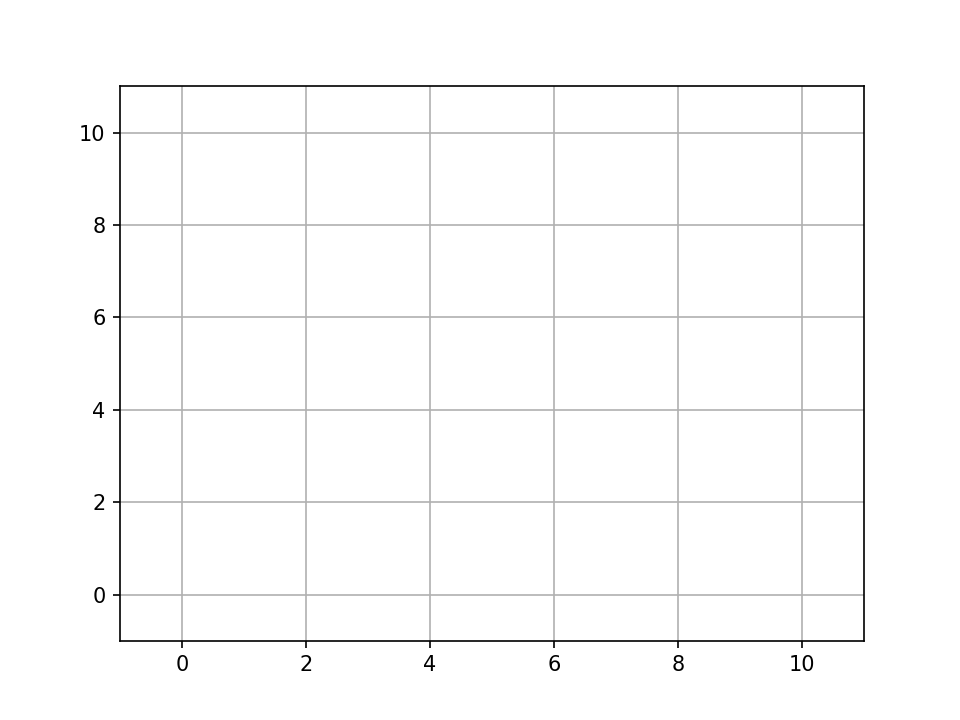

In [54]:
# Replay simulation
fig, ax = plt.subplots()

x= np.linspace(0,10,100)
def animate(ti):
    plt.cla()
    plt.scatter(*r[ti][:2])
    plt.plot(r[np.maximum(0, ti - 10):ti, 0],
             r[np.maximum(0, ti - 10):ti, 1])
    plt.xlim(np.min(X) - 1, np.max(X) + 1)
    plt.ylim(np.min(Y) - 1, np.max(Y) + 1)
    plt.grid(True)

matplotlib.animation.FuncAnimation(fig, animate, frames=iterations)

Now that you see how this simulation is set up, try simulating different scenarios:
- Add an initial velocity to your particle
- Add a uniform magnetic field
- Remove the magnetic field and add a uniform electric potential
- Remove the electric potential and add a uniform gravitational potential
- Add more than one of the above together
- Add a non-uniform electric or magnetic field
- Can you recreate $\vec{E}\times\vec{B}$ drift?
- Can you recreate $\nabla \vec{B}$ drift?
- What happens when you change the mass or the charge of your particle?
- What happens when you change the simulation timestep (tau)?
- Challenge: try adding another particle and simulating both together
- Advanced challenge: simulate two particles along with the electric fields they produce
- Advanced challenge: simulate two particles along with the electric and magnetic fields they produce